<a href="https://colab.research.google.com/github/nechebarrena/HOML/blob/main/HOML_cap_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPITULO 8 - HANDS ON MACHINE LEARNING**
## **Reduccion de dimensionalidad**

Existen muchos problemas donde contamos con enormes cantidades de atributos. En general, tener muchos atributos, vuelve mas complejo al problema y uno mucha veces necesita simplificarlo. Una forma de hacer esto es reducir la cantidad de atributos que nuestro modelo va a procesar, para eso existen diversas tecnicas de reduccion de la dimensionalidad. Ademas, estas mismas tecnicas muchas veces se utilizan con el objetivo de ayudar a la visualizacion de ciertos aspectos del problema. Para estos dos objetivos el libro propone tratar las tres tecnicas princiapes, PCA, Kernel PCA, y LLE.



El principal problema de los sistemas con un gran numero de dimensiones es que conforme aumenta la cantidad de estas, aumenta la necesidad de datos de entrenamiento para llenar el espacio de fases. Esto se debe a que, para simplificar, al aumentar la cantidad de dimensiones aumenta el volumen del espacio y por lo tanto la cantidad de puntos que lo llenan. Esto a su vez tiene otra consecuencia un poco menos intuitiva, cuanto mas grande es la cantidad de dimensiones los puntos tienden a concentrarse mas sobre la superficie del volumen. Esto significa que en general la distancia entre 2 puntos tiende a ser mayor y por lo tanto, cuando entrenemos un modelo que haga una interpolacion entre ambos sera menos preciso. 

### **Metodos principales** 

Existen 2 metodos que son los principales a la hora de implementar una reduccion de dimensionalidad que vamos a ver a continuacion:

#### **Proyeccion**

Muchas veces los datos experimentales con los que contamos pueden ser proyectados en sub espacios del espacio original. Esta proyeccion implica perder alguna dimension original del problema, o sea, perder informacion. Sin embargo, uno puede buscar cual es el sub espacio que permite reducir la dimension minimizando la perdida de informacion. Para eso debemos buscar cual es este sub espacio "que se parece" a los datos.

En las figuras $8.2$ y $8.3$ del libro se muestra un ejemplo de esto que deja bastante clara esta situacion y lo que se busca.

#### **Aprendizaje con Manifolds**

Un _d-manifold_ es una superficie "enrollada" en un espacio de _d_ dimensiones dentro de un espacio mayor de _n_ dimensiones. Esto que suena dificil de explicar es muy facil de ver. En la figura $8.4$ del libro se muestra un ejemplo muy claro. Se puede ver una nube de puntos en _3-D_ que sin embargo puede ser "desenrrollada" en un plano _2-D_.

La hipotesis detras de estos metodos consta en general de 2 partes. La primera es la que ya mencionamos, que los datos pueden expresarse en un espacion menor con una perdida muy chica de informacion. La segunda parte de la hipotesis es que uno luego puede realizar una tarea posterior (clasificacion, regresion, etc) sobre este nuevo espacio de forma mas sencilla. Esta segunda hipotesis no siempre es cierta. La figura $8.6$ del libro ejemplifica esto con un conjunto de datos donde una tarea de clasificacion resulta mas "sencilla" sobre el espacio original que sobre el espacio reducido.

Ahora que vimos por arriba la idea general de la reduccion de dimensionalidad veamos algunos de los metodos las utilizados.



### **PCA**

El metodo de analisis de componentes principales (PCA en ingles) es el mas utilizado y comun al dia de hoy. La idea de este algortimo es, tal como explicamos inicialmente, buscar el subespacio que mas se parece a los datos y proyectar estos sobre el. 

#### **Conservando la varianza**

El primer paso del metodo es encontrar cual es el hiperplano donde se puedan proyectar los datos con la menor perdida de informacion posible. Para eso vamos a buscar un hiperplano donde, luego de proyectar, nos quedemos con la maxima varianza posible de la original.

,X,Y,X_p,Y_p
0,-0.378190,0.427116,-0.569437,0.034595
1,-11.014993,1.651343,-8.956452,-6.621100
2,10.225980,1.624423,6.082220,8.379500
3,-1.579312,0.876504,-1.736524,-0.496960
4,-8.476195,0.881279,-6.616733,-5.370417


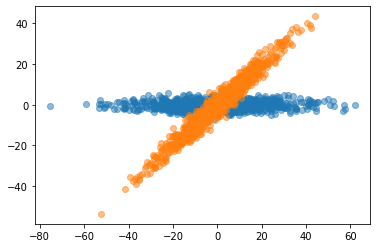

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

angulo = 0.25*np.pi

puntos = pd.DataFrame()


mu_x = 0
sigma_x = 20
mu_y = 0
sigma_y = 2


x = np.random.normal(mu_x, sigma_x, 1000)
y = np.random.normal(mu_y, sigma_y, 1000)
puntos['X'] = x
puntos['Y'] = y


puntos['X_p'] = puntos.apply(lambda row: np.cos(angulo)*row['X'] - np.sin(angulo)*row['Y'] , axis=1)
puntos['Y_p'] = puntos.apply(lambda row: np.sin(angulo)*row['X'] + np.cos(angulo)*row['Y'] , axis=1)


plt.scatter(puntos['X'],puntos['Y'],alpha=0.5)
plt.scatter(puntos['X_p'],puntos['Y_p'],alpha=0.5)
puntos.head()

Para encontrar el hiperplano que maximiza la varianza de los datos se puede usar el metodo de SVD para descomponer la matrix original de los datos $\mathbf{X}$ en tres matrices $\mathbf{U\Sigma}$$\mathbf{V}^\intercal$. La matrix $\mathbf{V}$ contiene los vectores que describen el hiperplano buscado.
Aca el libro no justifica por que esto es asi, solo lo cuenta. Quizas valga la pena hacer el ejercicio de ver como funciona esta descomposicion y porque da esto.

Ahora vamos a tratar de hacer esto utilizando un metodo de numpy para realizar una descomposicion SVD.


[0.70467015 0.70953504] [ 0.70953504 -0.70467015]


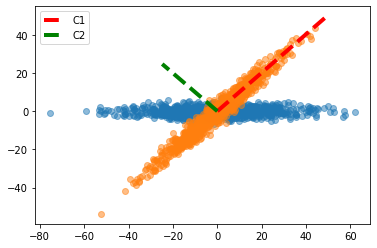

In [2]:
puntos_originales = pd.DataFrame()
puntos_originales['X'] = puntos['X_p']
puntos_originales['Y'] = puntos['Y_p']
U, s, Vt = np.linalg.svd(puntos_originales)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
print(c1,c2)

plt.scatter(puntos['X'],puntos['Y'],alpha=0.5)
plt.scatter(puntos['X_p'],puntos['Y_p'],alpha=0.5)
plt.plot([0,70*c1[0]],[0,70*c1[1]],color="red",linewidth=4,label="C1",linestyle="--")
plt.plot([0,-35*c2[0]],[0,-35*c2[1]],color="green",linewidth=4,label="C2",linestyle="--")
plt.legend()

Para poder hacer uso de la descomposicion SVD debemos tener los datos centrados en el origen de coordenadas. Vamos a ver cuando usemos Sklearn que el metodo PCA se encarga por nosotros de hacer la traslacion si fuese necesaria.

Una vez que encontramos el hiperplano lo que debemos hacer es proyectar los datos sobre el. En este caso podemos elegir sobre cuantas dimensiones proyectamos, con lo cual estamos deciciendo cuantas dimensiones queremos que tenga nuestro set de datos. En el caso ejemplificado con datos en dos dimensiones solo podemos tirar una (C2) y quedarnos con la coordenada C1 que es la que mas varianza conserva. Para realizar la proyeccion debemos hacer:

$\mathbf{X_{d-proy}} = \mathbf{XW_d}$

Donde $\mathbf{X_{d-proy}}$ es el nuevo dataset reducido, $\mathbf{X}$ es el dataset original y $\mathbf{W_d}$ es la matriz que contiene los $d$ primeros vectores de $\mathbf{V}$.

Text(0.5, 1.0, 'Proyeccion en 1-D')

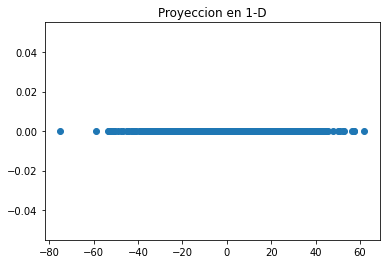

In [3]:
puntos_reducidos =puntos_originales.dot(c1)
plt.scatter(puntos_reducidos,np.zeros(len(puntos_reducidos)))
plt.title("Proyeccion en 1-D")

#### **Usando SkLearn**

Por suerte Sklearn una vez mas nos ofrece una solucion empaquetada para poder implementar el metodo PCA sin realizar todos estos pasos. El metodo se encarga de centrar los datos y realizar la proyeccion al numero de dimensiones que nosotros seleccionemos.


Text(0.5, 1.0, 'Proyeccion en 1-D utilizando SKlearn')

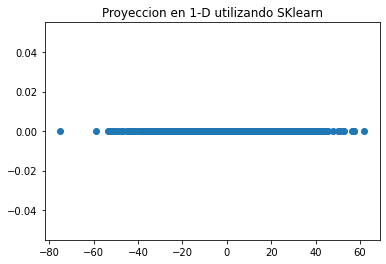

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
puntos_reducidos_skl = pca.fit_transform(puntos_originales)
plt.scatter(puntos_reducidos,np.zeros(len(puntos_reducidos_skl)))
plt.title("Proyeccion en 1-D utilizando SKlearn")

Si queremos saber cuales son los vectores de la descomposicion $\mathbf{W_d}$ podemos buscarlos en los atributos del objeto.

In [12]:
print("Direccion encontrada con SkLearn = ",pca.components_.T[:, 0])
print("Direccion encontrada con SVD = ", c1)

Direccion encontrada con SkLearn =  [-0.70472181 -0.70948374]
Direccion encontrada con SVD =  [0.70467015 0.70953504]


Porcentaje de varianza

In [13]:
var_p = pca.explained_variance_ratio_
print(var_p)

[0.98926868 0.01073132]


#### **Eligiendo la cantidad de dimensiones**

En general existen dos criterios distintos para la eleccion de la cantidad de dimensiones. EL primero es cuando deseamos visualizar algo. En este caso estamos obligados a quedarnos con 2 o 3 dimensiones independientemente de las dimensiones originales. 

El segundo caso es aquel donde fijamos un umbral de varianza minima que deseamos capturar. Este umbral de varianza minima, por ejemplo $80\%$, nos indica que debemos incluir todas las dimensiones necesarias para llegar a contener el $80\%$ de la varianza total del problema.

#### **Compresion con PCA**

Al reducir la cantidad de dimensiones utilizada lo que estamos haciendo es reducir la cantidad de informacion y por lo tanto comprimiendo los datos originales. Si a los datos reducidos le aplicamos la transformacion inversa y volvemos a la cantidad de dimensiones originales podemos recuperar un dataset muy parecido al original, pero en el proceso logramos reducir mucho su tamaño. El libro muestra como ejemplo el dataset de MINST. Para efectuar la transformacion inversa debemos hacer:
$\mathbf{X_{recuperado}}=\mathbf{X_{d-proy}}\mathbf{W_{d}^\intercal}$

#### **Metodos Incrementales y aleatorios**

Sobre el metodo original existen variaciones segun ciertas necesidades. El metodo aleatorio utiliza un algoritmo estocastico para encontrar las direcciones correctas, este metodo es mas rapido cuando la cantidad de dimensiones es menor a la cantidad de datos. Otro metodo es el incremental, que lo que hace es ir calculando las dimensiones adecuadas con batches de datos y no con todo el dataset original. Esto resulve el problema de que el dataset original sea muy grande y no entre u ocupe mucha memoria.


### **Kernel PCA**

